In [2]:
from shared.preface import *
import shared.functions as fct

### Snippets for cell division function.

In [20]:
parent_GRID_S = GRID_S
sub8_GRID_S = parent_GRID_S/2.
sub8_raw = fct.grid_3D(sub8_GRID_S, sub8_GRID_S)
print(sub8_raw/kpc)

pcs = 5  # amount of parent cells
sub8_temp = np.tile(sub8_raw, (pcs,1)).reshape((pcs, 8, 3))
# print(sub8_temp/kpc, sub8_temp.shape)

parent_cc = np.zeros((pcs,1,3))*kpc
parent_cc[1,...] += 2
parent_cc[4,...] += 2

sub8_coords = np.reshape(sub8_temp + parent_cc, (pcs*8, 1, 3))
print(sub8_coords[8:,...]/kpc)

[[-25. -25. -25.]
 [-25. -25.  25.]
 [-25.  25. -25.]
 [-25.  25.  25.]
 [ 25. -25. -25.]
 [ 25. -25.  25.]
 [ 25.  25. -25.]
 [ 25.  25.  25.]]
[[[-25. -25. -25.]]

 [[-25. -25.  25.]]

 [[-25.  25. -25.]]

 [[-25.  25.  25.]]

 [[ 25. -25. -25.]]

 [[ 25. -25.  25.]]

 [[ 25.  25. -25.]]

 [[ 25.  25.  25.]]

 [[-25. -25. -25.]]

 [[-25. -25.  25.]]

 [[-25.  25. -25.]]

 [[-25.  25.  25.]]

 [[ 25. -25. -25.]]

 [[ 25. -25.  25.]]

 [[ 25.  25. -25.]]

 [[ 25.  25.  25.]]

 [[-25. -25. -25.]]

 [[-25. -25.  25.]]

 [[-25.  25. -25.]]

 [[-25.  25.  25.]]

 [[ 25. -25. -25.]]

 [[ 25. -25.  25.]]

 [[ 25.  25. -25.]]

 [[ 25.  25.  25.]]

 [[-25. -25. -25.]]

 [[-25. -25.  25.]]

 [[-25.  25. -25.]]

 [[-25.  25.  25.]]

 [[ 25. -25. -25.]]

 [[ 25. -25.  25.]]

 [[ 25.  25. -25.]]

 [[ 25.  25.  25.]]]


In [25]:
DM_count = np.zeros(len(parent_cc))
DM_count[[1,3]] += 1
trimmed_cc = np.delete(parent_cc, np.s_[DM_count==0], axis=0)
print(trimmed_cc)

[[[2. 2. 2.]]

 [[0. 0. 0.]]]


In [7]:
rand_DM = np.random.random((2,5,3))
rand_DM[1,3:,:] = np.nan
print(rand_DM)

nan_count = np.count_nonzero(np.isnan(rand_DM))

unique_DM = np.unique(rand_DM)
print(unique_DM.shape)

print(
    len(unique_DM) == (len(rand_DM.flatten()) - (nan_count-1))
)

[[[0.15434176 0.17556648 0.21335351]
  [0.91894651 0.2279247  0.0075471 ]
  [0.83155062 0.10169956 0.61278451]
  [0.23160462 0.14556244 0.10171735]
  [0.71188698 0.34514265 0.26915718]]

 [[0.08509989 0.53612119 0.39524488]
  [0.72789885 0.6213975  0.43629882]
  [0.15335161 0.27770767 0.32877359]
  [       nan        nan        nan]
  [       nan        nan        nan]]]
(25,)
True


In [21]:
parts = np.random.randint(-10, 10, (2,5,3))

print(parts)

cell_len = np.ones((len(parts),1))*7
print(cell_len.shape)
cell_len[0] = 5

parts_in = np.asarray(
    (np.abs(parts[:,:,0]) <= cell_len) &
    (np.abs(parts[:,:,1]) <= cell_len) &
    (np.abs(parts[:,:,2]) <= cell_len)
)

print(parts_in)

parts = np.asarray(parts, dtype=np.float64)

parts[~parts_in] = np.nan

print(parts)

[[[  9   3  -3]
  [  1   4  -1]
  [  5   4 -10]
  [ -7   6   7]
  [-10  -6  -1]]

 [[ -9   7  -7]
  [ -7  -3   0]
  [  7  -2  -4]
  [  5   4  -8]
  [  4 -10   5]]]
(2, 1)
[[False  True False False False]
 [False  True  True False False]]
[[[nan nan nan]
  [ 1.  4. -1.]
  [nan nan nan]
  [nan nan nan]
  [nan nan nan]]

 [[nan nan nan]
  [-7. -3.  0.]
  [ 7. -2. -4.]
  [nan nan nan]
  [nan nan nan]]]


### Output of cell disvision.

In [2]:
adapted_cc = np.load('CubeSpace/adapted_cc_L006N188_snapshot_0036.npy')
DM_raw = np.load(
    'CubeSpace/DM_positions_L006N188_snapshot_0036_2.59e+11Msun.npy')
DM_count = np.load('CubeSpace/DM_count_L006N188_snapshot_0036.npy')
cell_com = np.load('CubeSpace/cell_com_L006N188_snapshot_0036.npy')
cell_gen = np.load('CubeSpace/cell_gen_L006N188_snapshot_0036.npy')

print(adapted_cc.shape, DM_raw.shape, DM_count.shape, cell_com.shape, cell_gen.shape)
print(np.sum(DM_count))
print(type(cell_com.shape[0]))

cell_com_rep = np.repeat(
        np.expand_dims(cell_com, axis=1), adapted_cc.shape[0], axis=1
    )
print(cell_com_rep.shape)

(1436, 1, 3) (150358, 3) (1436,) (1436, 3) (1436,)
150358
<class 'int'>
(1436, 1436, 3)


### Selecting only certain element for each column of 3D array.

In [3]:
a = np.zeros((3,3), int)
np.fill_diagonal(a, 1)
print(a)

t0 = np.arange(9).reshape(3,3)
print(t0[~a.astype(dtype=bool)].reshape(3,2))

a = np.repeat(np.expand_dims(a, axis=2), 3, axis=2)
# print(a)

t1 = np.arange(27).reshape(3,3,3)
# print(t1)
print(t1[~a.astype(dtype=bool)].reshape(3,2,3))

[[1 0 0]
 [0 1 0]
 [0 0 1]]
[[1 2]
 [3 5]
 [6 7]]
[[[ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]]]


## Argparse

Functions that use/make files:
- read_DM_positions
- cell_division
- cell_gravity_3D
- load_grid
- load_u_sim
- load_x_sim

Scripts that use/make files:
- discrete_precalculations_MW.py
- discrete_simulation_MW.py
- merger_tree.py
- smooth_simulation.py

In [4]:
class NuParser(object):

    input_x: str

    def __init__(self):
        
        parser = argparse.ArgumentParser(
            description="Argument Parser for Neutrino Clustering pipeline."
        )

        parser.add_argument(
            "-x",
            "--long_name_x",
            help="explain what x does",
            type=str,
            required=True
        )

        args = parser.parse_args()

        self.input_x = args.long_name_x


        print("{Parsed arguments:")
        print("---------------------\n")
        print(f"Parameter x: {self.input_x}")


## Tests

### Rearranging 2D array along one axis.

In [5]:
x2D = np.arange(6).reshape(2,3)
print(x2D)

ind2D = np.array([[1,0,2], [2,1,0]])

ax0 = np.arange(x2D.shape[0])[:,None]

print(ax0.shape, ind2D.shape)

new_x2D = x2D[ax0, ind2D]
print(new_x2D)

[[0 1 2]
 [3 4 5]]
(2, 1) (2, 3)
[[1 0 2]
 [5 4 3]]


### Rearranging 3D array along one axis.

In [6]:
x3D = np.arange(18).reshape(2,3,3)
print(x3D)
ind3D = np.array([[1,0,2], [2,1,0]])[:,:,None]

ax0 = np.arange(x3D.shape[0])[:,None,None]
ax2 = np.arange(x3D.shape[2])[None,None,:]

new_x3D = x3D[ax0,ind3D,ax2]
print(new_x3D)

[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]]
[[[ 3  4  5]
  [ 0  1  2]
  [ 6  7  8]]

 [[15 16 17]
  [12 13 14]
  [ 9 10 11]]]


### Conversions between momentum to velocity.

In [7]:
NU_MASSES = np.array([0.01, 0.05, 0.1, 0.3])*eV
Vs = 100
LOWER = 0.01*T_CNB
UPPER = 400*T_CNB

# Momentum range.
MOMENTA = np.geomspace(LOWER, UPPER, Vs)


# Without Lorentz factor.
v_mins = np.zeros(len(NU_MASSES))
v_maxs = np.zeros(len(NU_MASSES))
for i, m_nu in enumerate(NU_MASSES):
    v_km = MOMENTA / m_nu / (m/s)
    v_min, v_max = v_km[0], v_km[-1]
    print(f'(m/s) -> v_min = {v_min:.2f}, v_max = {v_max:.2f}, %c = {v_max/const.c.value*100:.2f} : for {m_nu} eV neutrino')

    v_mins[i] = v_min
    v_maxs[i] = v_max


# for m_nu in NU_MASSES:



# With Lorentz factor.
v_mins = np.zeros(len(NU_MASSES))
v_maxs = np.zeros(len(NU_MASSES))
for m_nu in NU_MASSES:
    v_km = 1/np.sqrt(m_nu**2/MOMENTA**2 + 1) / (m/s)
    v_min, v_max = v_km[0], v_km[-1]
    print(f'(m/s) -> v_min = {v_min:.2f}, v_max = {v_max:.2f}, %c = {v_max/const.c.value*100:.2f} : for {m_nu} eV neutrino')


#! Since the sim is using 0.3 eV mass, the max. velocity present in the sim is 
#! ~20% of c, not the ~98% of the 0.01 eV neutrino (see output of cell).


# Back to momentum to check formulas & functions.


(m/s) -> v_min = 50256.48, v_max = 2010259363.73, %c = 670.55 : for 0.01 eV neutrino
(m/s) -> v_min = 10051.30, v_max = 402051872.75, %c = 134.11 : for 0.05 eV neutrino
(m/s) -> v_min = 5025.65, v_max = 201025936.37, %c = 67.06 : for 0.1 eV neutrino
(m/s) -> v_min = 1675.22, v_max = 67008645.46, %c = 22.35 : for 0.3 eV neutrino
(m/s) -> v_min = 50256.48, v_max = 296513342.86, %c = 98.91 : for 0.01 eV neutrino
(m/s) -> v_min = 10051.30, v_max = 240334142.09, %c = 80.17 : for 0.05 eV neutrino
(m/s) -> v_min = 5025.65, v_max = 166963809.94, %c = 55.69 : for 0.1 eV neutrino
(m/s) -> v_min = 1675.22, v_max = 65394995.35, %c = 21.81 : for 0.3 eV neutrino


### Coordinates of Andromeda (AG) and the Virgo Cluster (VC).

In [8]:
# Cross-check with values in Mertsch et al. (2020).
# -> x and y coords. are switched, since our setup is different,
# and my x (their y) coords. differ by 8.5 kpc due to placement of sun
# on our x-axis.
coords_VC = fct.halo_pos(GLAT_VC, GLON_VC, DIST_VC/kpc)
print(coords_VC, 'in kpc')
coords_AG = fct.halo_pos(GLAT_AG, GLON_AG, DIST_AG/kpc)
print(coords_AG, 'in kpc')

[-4289.63477282  1056.51861602 15895.27621304] in kpc
[ 632.29742673 -377.40315121 -288.27006757] in kpc


### Values in Table 1 of Mertsch et al. (2020).

In [9]:
Rvir_Tab1 = fct.R_vir_fct(0, Mvir_MW)
print(Rvir_Tab1/kpc)
c_vir_Tab1 = fct.c_vir(0, Mvir_MW, Rvir_MW, Rs_MW)
Rs_Tab1 = Rvir_Tab1 / c_vir_Tab1
print(Rs_Tab1/kpc)

334.5551534573838
19.962961180815405


### Critical density of universe.

In [10]:
rho_crit_today = fct.rho_crit(0)
print(f'{rho_crit_today*(Msun/kpc**3)/(kg/m**3):.2e} kg/m^3') 

2.49e-39 kg/m^3


### Time Variable s(z) and comparison to age of universe.

In [11]:
# In s_of_z function we use
H0_mod = H0/ (1/s)
print(H0_mod)

test_z = 1
s_val = fct.s_of_z(test_z)
print(f'Value of time variable s in seconds at redhshift {test_z}:','\n', s_val)
print(
    'Age of universe comparison: \n', 
    f'"Observed/measured": {t0/s:.2e}, i.e. {t0/Gyr:.2f} Gyr \n', 
    f'What we use in s_of_z function: {1/H0/s:.2e}, i.e. {1/H0/Gyr:.2f} Gyr'
)

2.1842852412351247e-18
Value of time variable s in seconds at redhshift 1: 
 5.0926383866523136e+17


TypeError: unsupported format string passed to numpy.ndarray.__format__

### Integrals for cosmic time.

In [12]:
def t_integrand_a(a):

    # We need value of H0 in units of 1/s.
    H0_val = H0/(1/s)

    a_dot = np.sqrt(Omega_M/a**3 + Omega_L)*H0_val*a
    t_int = 1./a_dot

    return t_int

t, err = quad(t_integrand_a, 0, 1)
t_uni, err_uni = t, err
print(t_uni*s/Gyr, err_uni*s/Gyr)

13.854185334518117 2.035514967021816e-12


In [13]:
def t_integrand_z(z):

    # We need value of H0 in units of 1/s.
    H0_val = H0/(1/s)

    a_dot = np.sqrt(Omega_M*(1.+z)**3 + Omega_L)*H0_val*(1.+z)
    t_int = 1./a_dot

    return t_int

t, err = quad(t_integrand_z, 0, np.inf)
t_uni, err_uni = t, err
print(t_uni*s/Gyr, err_uni*s/Gyr)

13.854185334518112 3.8804667681380004e-11


### Fermi-Dirac distribution.

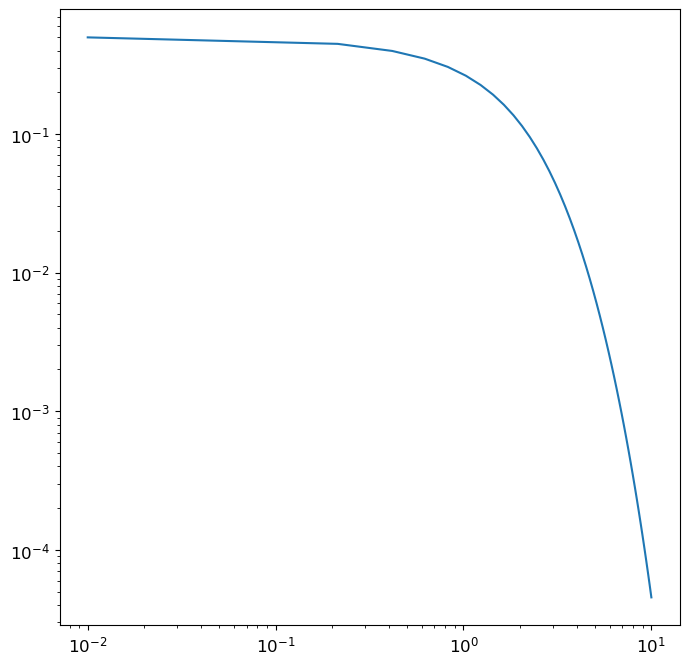

In [14]:
p_test_range = np.linspace(0.01, 10)*T_CNB
FD_range = fct.Fermi_Dirac(p_test_range)

plt.loglog(p_test_range/T_CNB, FD_range)
plt.show()

### Redshift array for integration steps.

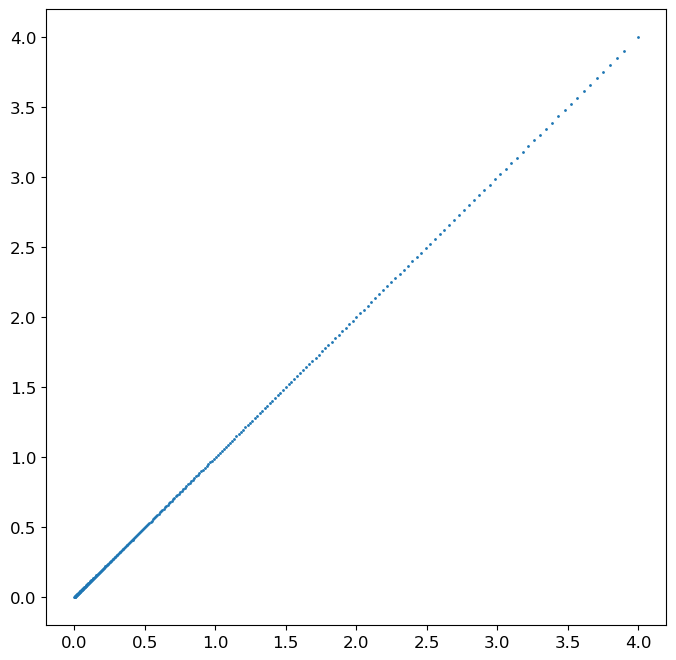

[0.         0.00124557 0.00250666 0.00378345 0.00507615 0.00638495
 0.00771005 0.00905166 0.01040998 0.01178521] 4.0


In [15]:
# Linear spacing.
# late_steps = 200
# early_steps = 100
# Z_START, Z_STOP, Z_AMOUNT = 0., 4., late_steps+early_steps
# z_late = np.linspace(0,1,late_steps)
# z_early = np.linspace(1.01,4,early_steps)
# ZEDS = np.concatenate((z_late, z_early))

# Logarithmic spacing.
Z_START, Z_STOP, Z_AMOUNT = 0., 4., 300-1  # -1 to compensate np.insert of z=4
Z_START_LOG = 1e-1
zeds_pre = np.geomspace(Z_START_LOG, Z_STOP, Z_AMOUNT) - Z_START_LOG
ZEDS = np.insert(zeds_pre, len(zeds_pre), 4.)

plt.scatter(ZEDS, ZEDS, s=1)
plt.show()
print(ZEDS[0:10], ZEDS[-1])

### Redshift z of each snapshot.

In [16]:
sim = 'L006N188'

zeds = np.zeros(25)
nums = []
for j, i in enumerate(range(12,37)):
    snap_i = f'{i:04d}'
    nums.append(snap_i)

    with h5py.File(str(next(
        pathlib.Path(
            f'{SIM_DATA}/{sim}').glob(f'**/snapshot_{snap_i}.hdf5'
        )
    ))) as snap:
        zeds[j] = snap['Cosmology'].attrs['Redshift'][0]

np.save(f'shared/ZEDS_SNAPSHOTS.npy', np.asarray(zeds))
np.save(f'shared/NUMS_SNAPSHOTS.npy', np.asarray(nums))
print(np.round(np.asarray(zeds),2))

[3.81 3.43 3.09 2.79 2.52 2.28 2.06 1.86 1.68 1.51 1.36 1.21 1.08 0.96
 0.85 0.74 0.64 0.55 0.46 0.37 0.29 0.21 0.14 0.07 0.  ]


### NFW density profile fct.

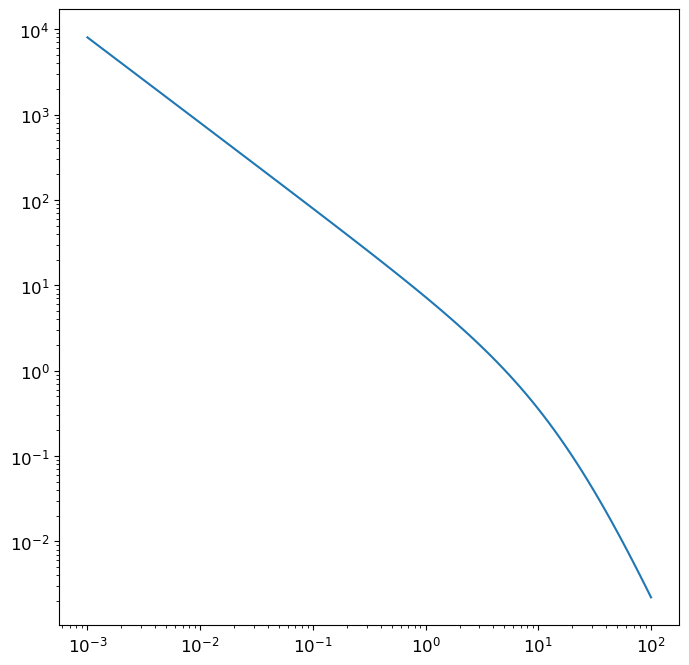

In [17]:
r_range = np.geomspace(1e-3, 100, 100)*kpc
NFW_vals = fct.NFW_profile(r_range, rho0_MW, Rs_MW)
plt.loglog(r_range/kpc, NFW_vals/(GeV/cm**3))

### Typical grav. potential gradient vectors in spher. symmetric simulation.

In [18]:
z = 0

# For position of Sun/Earth.
x_i = X_SUN*kpc
grad_MW = fct.dPsi_dxi_NFW(x_i, z, rho0_MW, Mvir_MW, Rvir_MW, Rs_MW, 'MW')
grad_MW /= (kpc/s**2)
print('Position of Sun/Earth:')
print(grad_MW)
print(np.sqrt(np.sum(grad_MW**2)), '\n')

# For a position closer to the center of the halo.
x_i = np.array([0.01, 0, 0])*kpc
grad_MW = fct.dPsi_dxi_NFW(x_i, z, rho0_MW, Mvir_MW, Rvir_MW, Rs_MW, 'MW')
grad_MW /= (kpc/s**2)
print('Position close to center:')
print(grad_MW)
print(np.sqrt(np.sum(grad_MW**2)), '\n')

# For a position further away to the center of the halo.
x_i = np.array([333., 0, 0])*kpc
grad_MW = fct.dPsi_dxi_NFW(x_i, z, rho0_MW, Mvir_MW, Rvir_MW, Rs_MW, 'MW')
grad_MW /= (kpc/s**2)
print('Position at virial radius:')
print(grad_MW)
print(np.sqrt(np.sum(grad_MW**2)))

Position of Sun/Earth:
[-3.71639088e-30 -0.00000000e+00 -0.00000000e+00]
3.7163908835814e-30 

Position close to center:
[-6.00197009e-30 -0.00000000e+00 -0.00000000e+00]
6.00197009076699e-30 

Position at virial radius:
[-8.32754774e-32 -0.00000000e+00 -0.00000000e+00]
8.327547735357829e-32


### Test memory sizes

In [19]:
mem = np.random.random(size=(40000000,3))
print(mem.shape, (mem.nbytes)/1e6)

mem0 = np.empty((40000000,3))
print(mem0.shape, (mem0.nbytes)/1e6)

(40000000, 3) 960.0
(40000000, 3) 960.0


40 million cells have ~ 1GB memory. There shouldn't be memory issues with the final arrays, especially with the SNELLIUS cluster memory nodes of ~64GB or even ~128GB.